# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import openweathermapy as ow
from citipy import citipy
from scipy.stats import linregress


# Import API key
from config import weather_api_key

## Generate Cities List

In [21]:
# Create empty lists for lat and lng values and for cities
lat_lngs = [] 
cities = []

# Using google I found that Latitudes range form -90 to 90 and longitudes range from -180 to 180
# Generate random latitude and longitudes 
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Found the zip function to combine the lat and lng lists https://www.saltycrane.com/blog/2007/12/iterating-through-two-lists-in-parallel/
lat_lngs = zip(lat,lng)

# Find the nearest city to each lat and lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # Check that the city is unique before adding it to our cities list
    if city not in cities:
        cities.append(city)
# print length of cities list to verify we have at least 500
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Create empty list to hold city data
city_data = []
city_num = 1
# Print message
print('Beginning Data Retreival')
print('----------------------------')
# loop through each city and collect their weather data
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}"
    print(f"Processing Record {city_num} | {city}")
    city_num += 1
    # Get weather data
    weather_data = requests.get(query_url).json()

    try:
        lat = weather_data['coord']['lat']
        lng = weather_data['coord']['lon']
        max_temp = weather_data['main']['temp_max']
        humidity = weather_data['main']['humidity']
        cloudiness =  weather_data['clouds']['all']
        wind_speed = weather_data['wind']['speed']
        country = weather_data['sys']['country']
        date = weather_data['dt']
        city_data.append({
            'City': city,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': wind_speed,
            'Country': country,
            'Date': date
            })
    except:
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
----------------------------
Processing Record 1 | hobart
Processing Record 2 | praia
Processing Record 3 | arraial do cabo
Processing Record 4 | puerto ayora
Processing Record 5 | kapaa
Processing Record 6 | el carmen
Processing Record 7 | punta arenas
Processing Record 8 | havelock
Processing Record 9 | vaini
Processing Record 10 | virginia beach
Processing Record 11 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 | chokurdakh
Processing Record 13 | sur
Processing Record 14 | taolanaro
City not found. Skipping...
Processing Record 15 | rikitea
Processing Record 16 | new norfolk
Processing Record 17 | inirida
Processing Record 18 | alad
Processing Record 19 | mys shmidta
City not found. Skipping...
Processing Record 20 | aklavik
Processing Record 21 | hithadhoo
Processing Record 22 | esperance
Processing Record 23 | busselton
Processing Record 24 | bluff
Processing Record 25 | yuanping
Processing Record 26 | tuatapere
Processing Record 27 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
weather_df = pd.DataFrame(city_data)
weather_df.to_csv("../Output/weather_data.csv", index=True, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,48.2,70,92,8.05,AU,1599760851
1,praia,14.92,-23.51,86.0,66,75,11.41,CV,1599761598
2,arraial do cabo,-22.97,-42.03,84.2,58,54,20.80,BR,1599760985
3,puerto ayora,-0.74,-90.35,75.2,60,40,19.46,EC,1599760886
4,kapaa,22.08,-159.32,80.6,69,40,13.87,US,1599761049


In [24]:
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,17.376070,16.132362,68.196624,71.099631,51.429889,7.952675,1.599761e+09
std,33.371841,93.713645,16.065722,21.083700,36.561114,5.409111,2.690284e+02
min,-54.800000,-179.170000,27.280000,7.000000,0.000000,0.490000,1.599761e+09
25%,-9.365000,-69.310000,55.400000,61.000000,18.250000,4.220000,1.599761e+09
50%,19.740000,20.240000,71.160000,77.000000,53.000000,6.910000,1.599762e+09
75%,44.785000,102.277500,80.010000,86.000000,90.000000,10.480000,1.599762e+09
max,78.220000,179.320000,107.060000,100.000000,100.000000,40.130000,1.599762e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

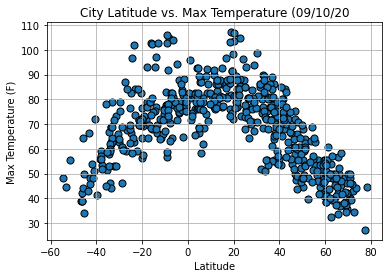

In [46]:
weather_df = weather_df.set_index('City')
lat_temp_df = weather_df[['Lat', 'Max Temp']]
lat_temp_plot = lat_temp_df.plot(kind='scatter',x='Lat',y='Max Temp',grid=True, s= 50, edgecolor='black', title='City Latitude vs. Max Temperature (09/10/20')
lat_temp_plot.set_xlabel('Latitude')
lat_temp_plot.set_ylabel('Max Temperature (F)')
# Save scatter plot as png
plt.savefig("../Output/lat_temp_plot.png")
plt.show()

This scatter plot is comparing the max temperature of each city to their respective latitudes. You can clearly see that there is a strong, non-linear relationship between max temperature and city latitudes.

## Latitude vs. Humidity Plot

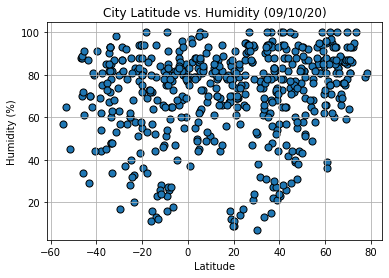

In [47]:
lat_hum_df = weather_df[['Lat', 'Humidity']]
lat_hum_plot = lat_hum_df.plot(kind='scatter',x='Lat',y='Humidity',grid=True, s= 50, edgecolor='black',title='City Latitude vs. Humidity (09/10/20)')
lat_hum_plot.set_xlabel('Latitude')
lat_hum_plot.set_ylabel('Humidity (%)')
# Save scatter plot as png
plt.savefig("../Output/lat_humidity_plot.png")
plt.show()

This scatter plot is comparing the current humidity of each city to their respective latitudes. As you can see, there is no clear relationship between humidity and city latitudes.

## Latitude vs. Cloudiness Plot

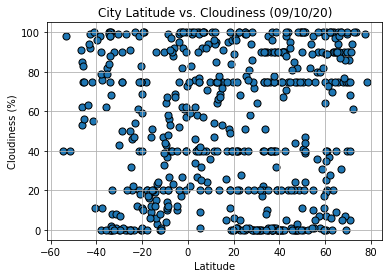

In [48]:
lat_cloud_df = weather_df[['Lat', 'Cloudiness']]
lat_cloud_plot = lat_cloud_df.plot(kind='scatter',x='Lat',y='Cloudiness',grid=True, s= 50, edgecolor='black',title='City Latitude vs. Cloudiness (09/10/20)')
lat_cloud_plot.set_xlabel('Latitude')
lat_cloud_plot.set_ylabel('Cloudiness (%)')
# Save scatter plot as png
plt.savefig("../Output/lat_cloud_plot.png")
plt.show()

This scatter plot is comparing the current cloudiness of each city to their respective latitudes. As you can see, there is no clear relationship between cloudiness and city latitudes.

## Latitude vs. Wind Speed Plot

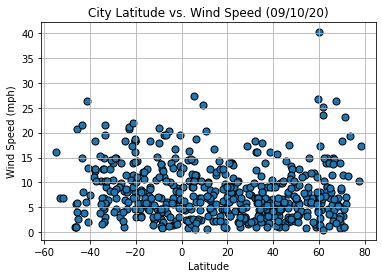

In [49]:
lat_wind_df = weather_df[['Lat', 'Wind Speed']]
lat_wind_plot = lat_wind_df.plot(kind='scatter',x='Lat',y='Wind Speed',grid=True, s= 50, edgecolor='black',title='City Latitude vs. Wind Speed (09/10/20)')
lat_wind_plot.set_xlabel('Latitude')
lat_wind_plot.set_ylabel('Wind Speed (mph)')
# Save scatter plot as png
plt.savefig("../Output/lat_wind_plot.png")
plt.show()

This scatter plot is comparing the current wind speed of each city to their respective latitudes. As you can see, there is no clear relationship between wind speed and city latitudes.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.80958608839707


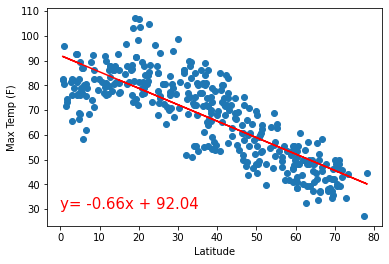

In [31]:
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
n_temp_lat_df = northern_df[['Max Temp', "Lat"]]
x_values = n_temp_lat_df['Lat']
y_values = n_temp_lat_df['Max Temp']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(0,30), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the max temperature of each Northern Hemisphere city compared to their respective latitudes. With an r-value of -0.80958608839707, we know there is a strong negative linear relationship. Therefore, the farther away from the equater, the lower the max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6774132258839066


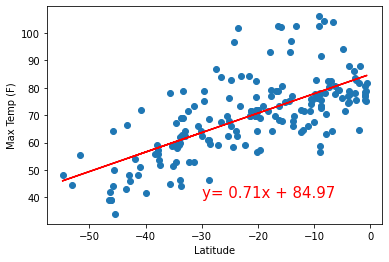

In [32]:
southern_df = weather_df.loc[weather_df['Lat'] < 0]
s_temp_lat_df = southern_df[['Max Temp', "Lat"]]
x_values = s_temp_lat_df['Lat']
y_values = s_temp_lat_df['Max Temp']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(-30,40), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the max temperature of each Southern Hemisphere city compared to their respective latitudes. With an r-value of 0.6774132258839066, we know there is a strong positive linear relationship. Therefore, the closer we get to the equator, the higher the max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14892557736990378


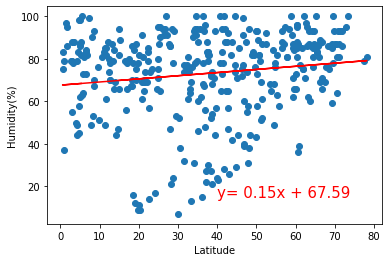

In [33]:
n_hum_lat_df = northern_df[['Humidity', "Lat"]]
x_values = n_hum_lat_df['Lat']
y_values = n_hum_lat_df['Humidity']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(40,15), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the humidity of each Northern Hemisphere city compared to their respective latitudes. With an r-value of 0.14892557736990378, we know there is a very weak positive linear relationship. Therefore, as we move farther away from the equater, the humidity slightly gets higher.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03137696404559357


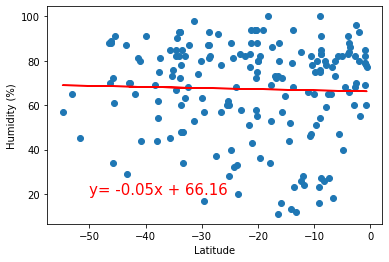

In [34]:
s_hum_lat_df = southern_df[['Humidity', "Lat"]]
x_values = s_hum_lat_df['Lat']
y_values = s_hum_lat_df['Humidity']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(-50,20), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the humidity of each Southern Hemisphere city compared to their respective latitudes. With an r-value of -0.03137696404559357, we know there is not much of a linear relationship, but we see there is an extremely weak negative linear relationship. Therefore, as we get closer to the equator the humidity is slightly lower.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03648153084457544


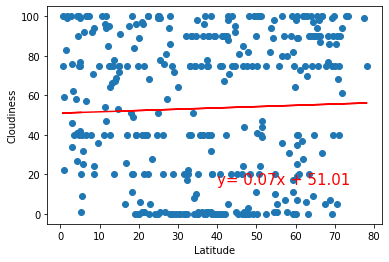

In [35]:
n_cloud_lat_df = northern_df[['Cloudiness', "Lat"]]
x_values = n_cloud_lat_df['Lat']
y_values = n_cloud_lat_df['Cloudiness']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(40,15), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the cloudiness of each Northern Hemisphere city compared to their respective latitudes. With an r-value of 0.03648153084457544, we know there is not much of a linear relationship, but we can see an extremely weak positive linear relationship. Therefore, as we move farther away from the equater, it will slowly get cloudier.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.10192700933601763


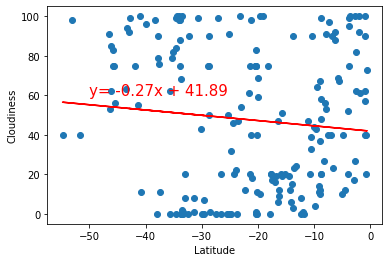

In [36]:
s_cloud_lat_df = southern_df[['Cloudiness', "Lat"]]
x_values = s_cloud_lat_df['Lat']
y_values = s_cloud_lat_df['Cloudiness']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(-50,60), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the cloudiness of each Southern Hemisphere city compared to their respective latitudes. With an r-value of -0.10192700933601763, we see there is a very weak negative linear relationship. Therefore, as we get closer to the equator there are slightly less clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06357805787955251


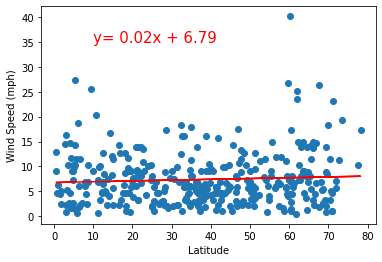

In [37]:
n_wind_lat_df = northern_df[['Wind Speed', "Lat"]]
x_values = n_wind_lat_df['Lat']
y_values = n_wind_lat_df['Wind Speed']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(10,35), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the wind speed of each Northern Hemisphere city compared to their respective latitudes. With an r-value of 0.06357805787955251, we know there is not much of a linear relationship, but we can see an extremely weak positive linear relationship. Therefore, as we move farther away from the equater, there is slightly more wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0704147286192755


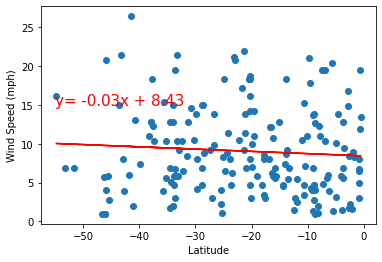

In [38]:
s_wind_lat_df = southern_df[['Wind Speed', "Lat"]]
x_values = s_wind_lat_df['Lat']
y_values = s_wind_lat_df['Wind Speed']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(-55,15), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

This plot is displaying the linear regression of the wind speed of each Southern Hemisphere city compared to their respective latitudes. With an r-value of -0.0704147286192755, we see there is a very weak negative linear relationship. Therefore, as we get closer to the equator there are slightly slower wind speeds.